<h1>What Is Data Visualization?</h1>
<hr>
<h3>“The representation of information in the form of a chart, diagram, picture, etc.”</h3>

<h6>
Use a simple bar chart showing the number of accidents per year (2019–2022) to illustrate how raw numbers become instantly understandable when visualized.
</h6>

In [2]:
import pandas as pd
df = pd.read_csv('datasets\\uk_accident_data.csv')

In [3]:
# Step 1: Convert to string only if not null
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')


df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('unaccounted')
df['Road_Type'] = df['Road_Type'].fillna('unaccounted')
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('unaccounted')

df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

Index                       0
Accident_Severity           0
Accident Date               0
Latitude                    0
Light_Conditions            0
District Area               0
Longitude                   0
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area        15
Weather_Conditions          0
Vehicle_Type                0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
dtype: int64

<Axes: xlabel='Year'>

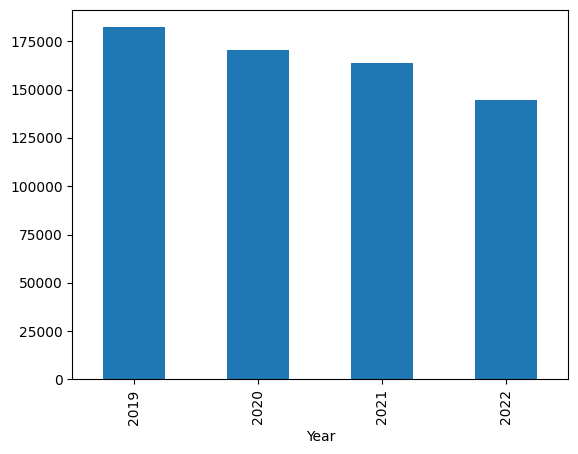

In [4]:
# Example: Bar chart of accident counts per year
import matplotlib.pyplot as plt
df.groupby('Year')['Index'].count().plot(kind='bar')

<h1>Why Is It Important?</h1>
<ul>
    <li><h4>Helps identify patterns, trends, and outliers.</h4> </li>
    <li><h4>Speeds up decision-making.</h4></li>
    <li><h4>Makes data accessible to non-technical stakeholders.</h4></li>
</ul>

<h4>
📊 Example Visualization: Line chart showing monthly accident trends over time. This reveals seasonal spikes (e.g., winter months, holidays).
</h4>

<h1>Types of Visualizations (with Dataset Examples)</h1>
<table>
    <tr>
        <th>
            Visualization Type
        </th>
        <th>
            UK Dataset Example
        </th>
        <th>
            Purpose
        </th>
    </tr>
    <tr>
        <td>
            Histogram
        </td>
        <td>
            Distribution of accident severity
        </td>
        <td>
            Show frequency of severity levels
        </td>
    </tr>
    <tr>
        <td>
            Heatmap
        </td>
        <td>
            Accidents by region vs. time of day
        </td>
        <td>
            Reveal hotspots and peak hours
        </td>
    </tr>
    <tr>
        <td>
            Box Plot
        </td>
        <td>
            Casualty age distribution
        </td>
        <td>
            Spot outliers and age concentration
        </td>
    </tr>
    <tr>
        <td>
            Pie Chart
        </td>
        <td>
            Proportion of accident causes
        </td>
        <td>
            Show relative contribution
        </td>
    </tr>
    <tr>
        <td>
            Stacked Bar Chart
        </td>
        <td>
            Road type vs. lighting condition
        </td>
        <td>
            Compare accident counts across categories
        </td>
    </tr>
</table>

<h1>Univariate Plotting </h1>
<h2>Focus on one variable at a time.</h2>

<h4>📌 Example: Histogram of vehicle types involved </h4>


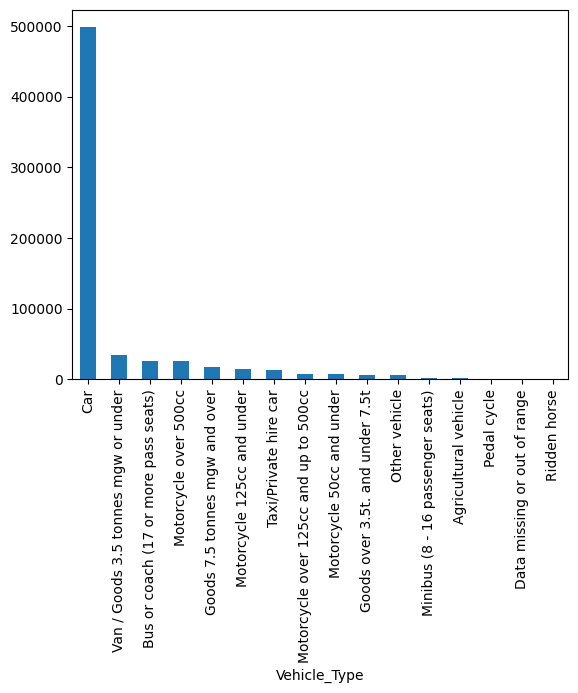

In [5]:

df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

In [6]:
nocar_df = df[df['Vehicle_Type'] != 'Car']
# nocar_df

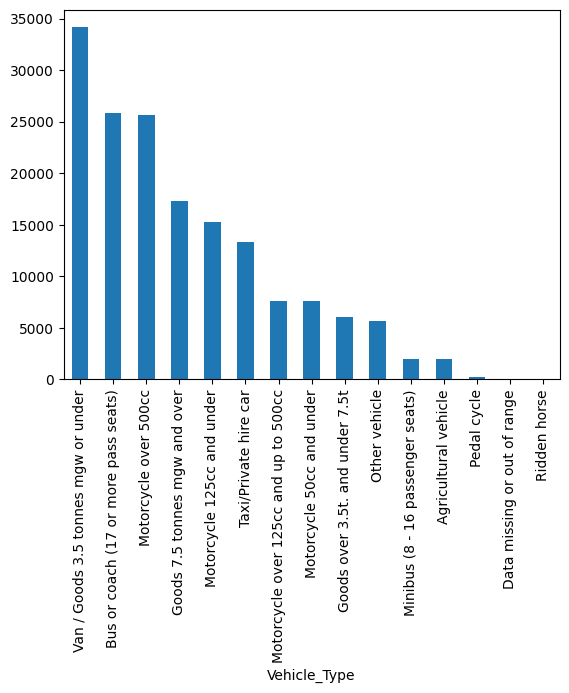

In [7]:
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

<h1> <i>A Data Analysis Journey: From National Trends to Local Insights </i></h1>

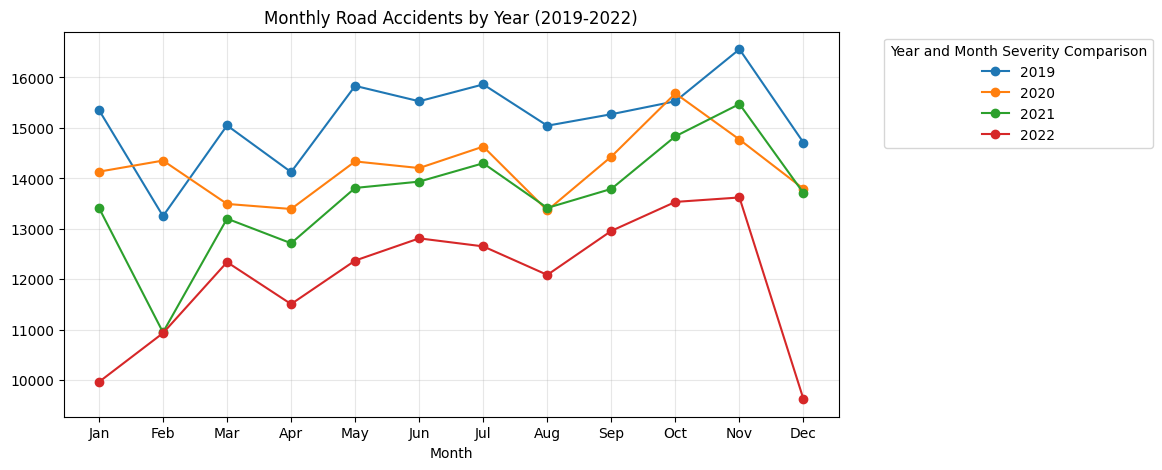

In [8]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = df.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h2><i>Seasonal Analysis </i></h2>

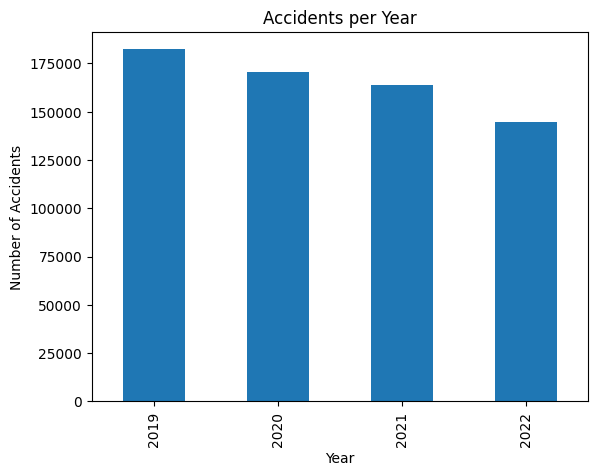

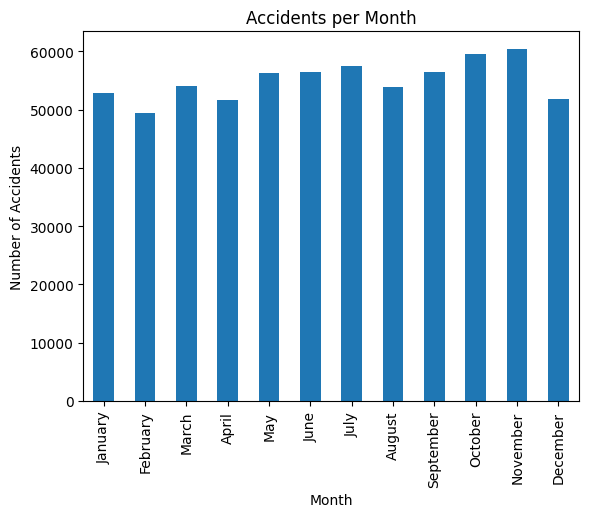

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


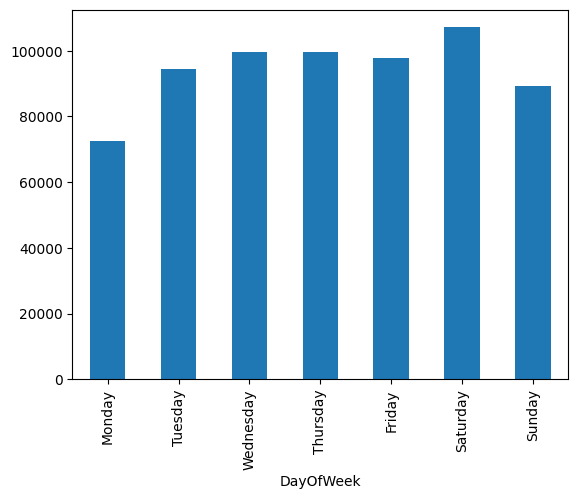

In [12]:
# Accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_day = df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [11]:
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_month

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: count, dtype: int64

<h3>Accident Severity </h3>

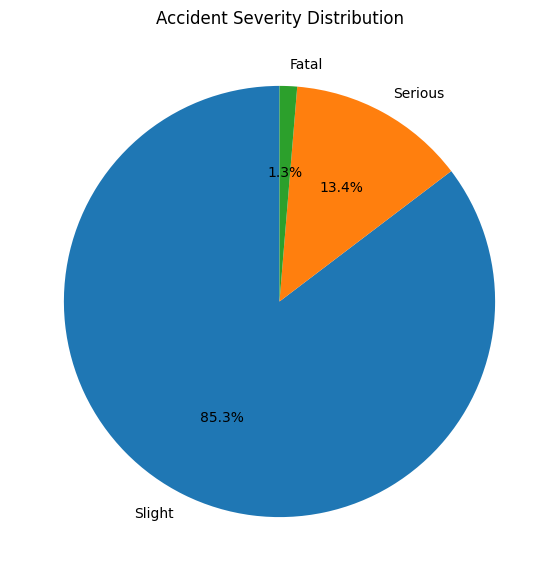

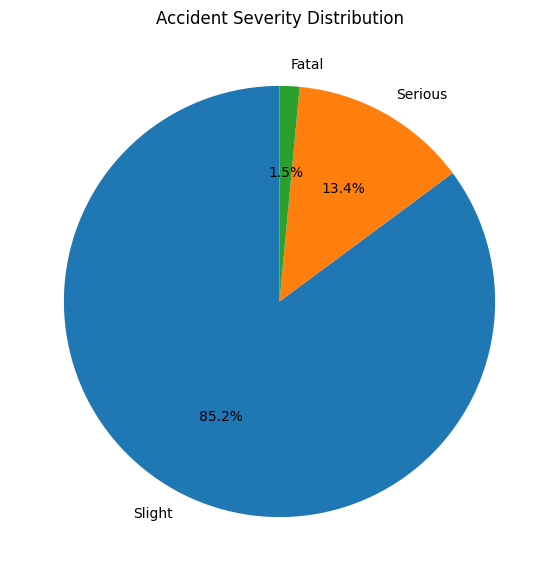

In [34]:
severity_counts = df['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019 = df[df['Year'] == 2019]
# severity_2019
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h1>Using District Area to make a comparison to a general result </h1>
<h3>London Analysis</h3>


In [19]:
# df.dtypes
london_df = df[df['District Area'] == 'City of London']

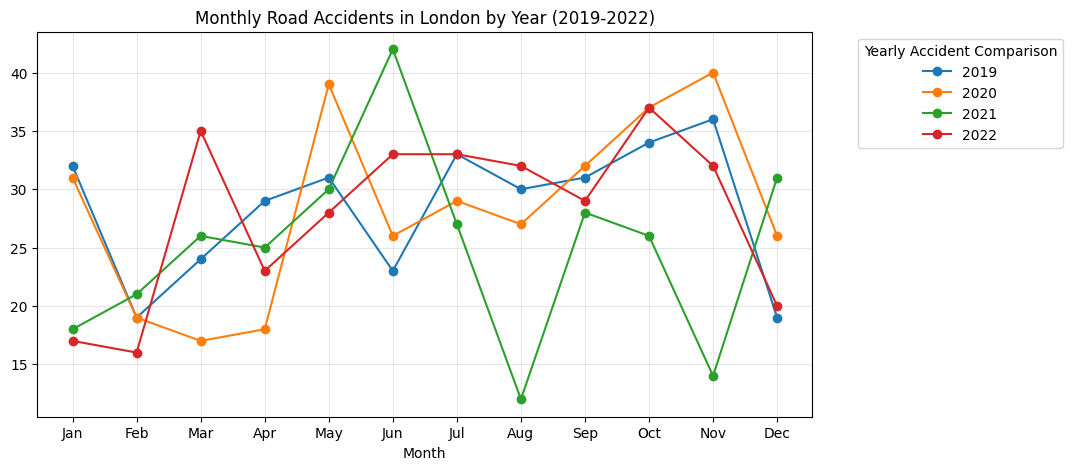

In [22]:
monthly_londondata = london_df.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

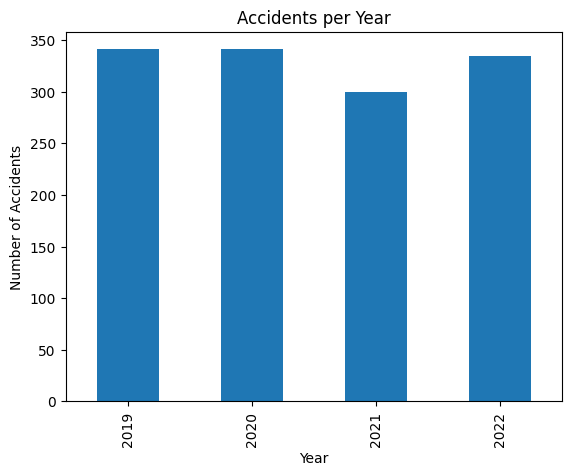

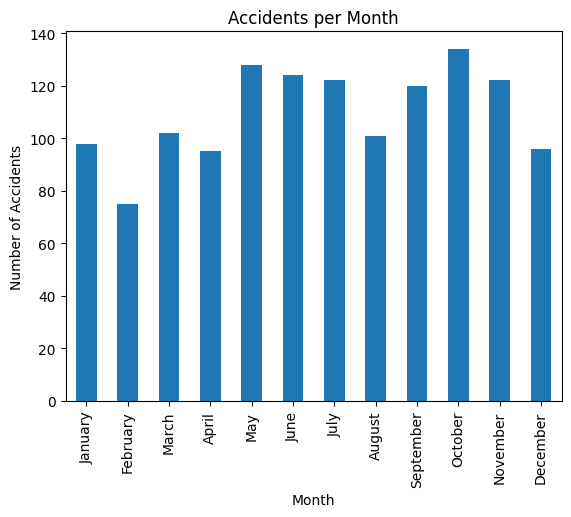

DayOfWeek
Monday        65
Tuesday      198
Wednesday    245
Thursday     244
Friday       249
Saturday     236
Sunday        80
Name: count, dtype: int64


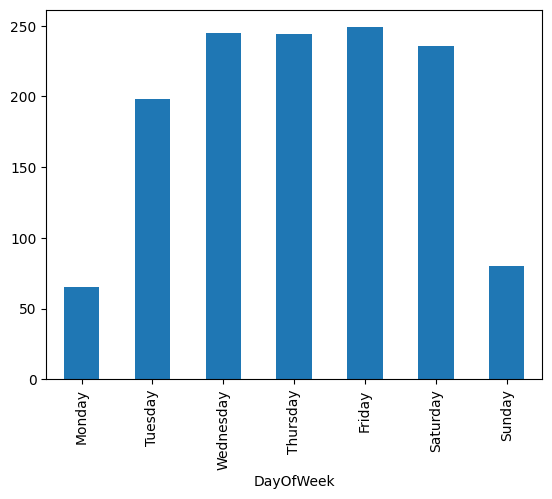

In [24]:
# Accidents per year
accidents_per_year = london_df['Year'].value_counts().sort_index()
accidents_per_month = london_df['Month'].value_counts().sort_index()
accidents_per_day = london_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h4><i>Accident Severity in London</i></h4>

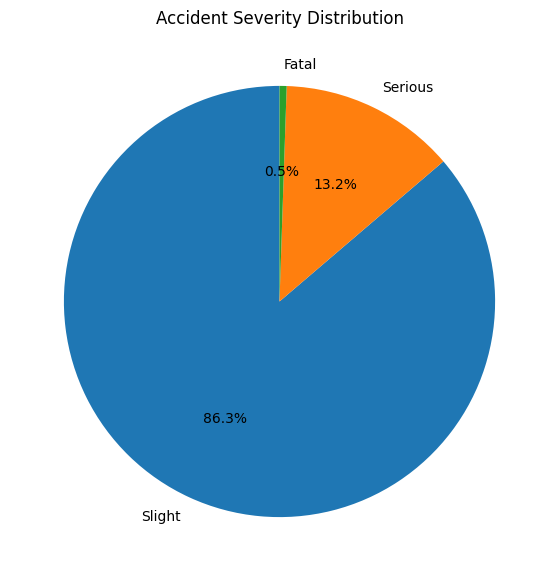

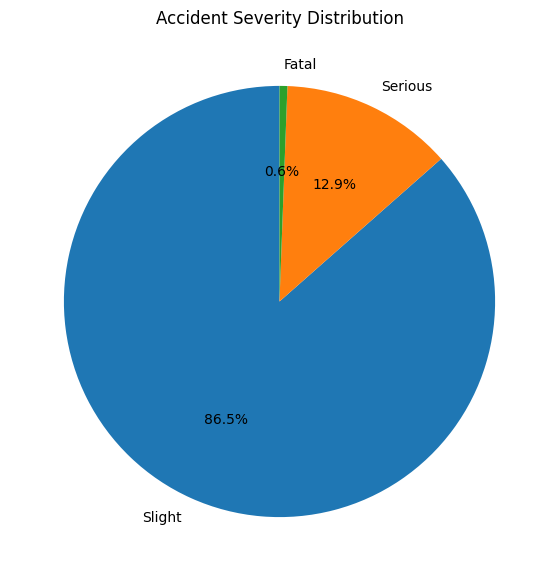

In [35]:
severity_london  = london_df['Accident_Severity'].value_counts()

plt.pie(severity_london,
        labels = severity_london.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_london = london_df[london_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_london['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()
